## This is how i will build some nice Table by remaking a tutorial


1. First we load LaLiga data and take what we need <br>
   Data is taken from fbref.com


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale as locale

from PIL import Image
import urllib
import os

locale.setlocale(locale.LC_ALL, "deu_deu")

df = pd.read_csv('data/Liga3Players.csv', header=[1])


Narrow the amount of players down to players with more than 0.75 g+a per 90 mins and have played for a minimum of 270 mins (3 games) <br>
Select important columns and sort players based on Goals + Assists / 90 mins


In [20]:
filtered_values = np.where((df['G+A'] > 0.75) & (df['Min'] > 280))
df_selected = df.loc[filtered_values]
df_selected = df_selected[['Player', 'Pos', 'MP', 'Min', 'G+A', 'Squad']]
df_selected = df_selected.sort_values(
    by='G+A', ascending=True).reset_index(drop=True)
df_selected


,Player,Pos,MP,Min,G+A,Squad
0,André Becker,FW,7,350.0,0.77,Viktoria Köln
1,Simon Engelmann,FW,11,817.0,0.77,Rot-Weiss Essen
2,Ivan Prtajin,FW,12,937.0,0.77,Wehen
3,Tobias Bech,MFFW,14,805.0,0.78,Ingolstadt 04
4,Kianz Froese,FWMF,12,567.0,0.79,Wehen
5,Ba-Muaka Simakala,FWMF,17,1235.0,0.80,Osnabrück
6,Adriano Grimaldi,FW,12,325.0,0.83,Saarbrücken
7,John Iredale,FWMF,12,416.0,0.87,Wehen
8,Koffi,FW,17,884.0,0.92,Elversberg
9,Merlin Röhl,MF,4,292.0,0.92,Ingolstadt 04


2. Now we plot the basic table


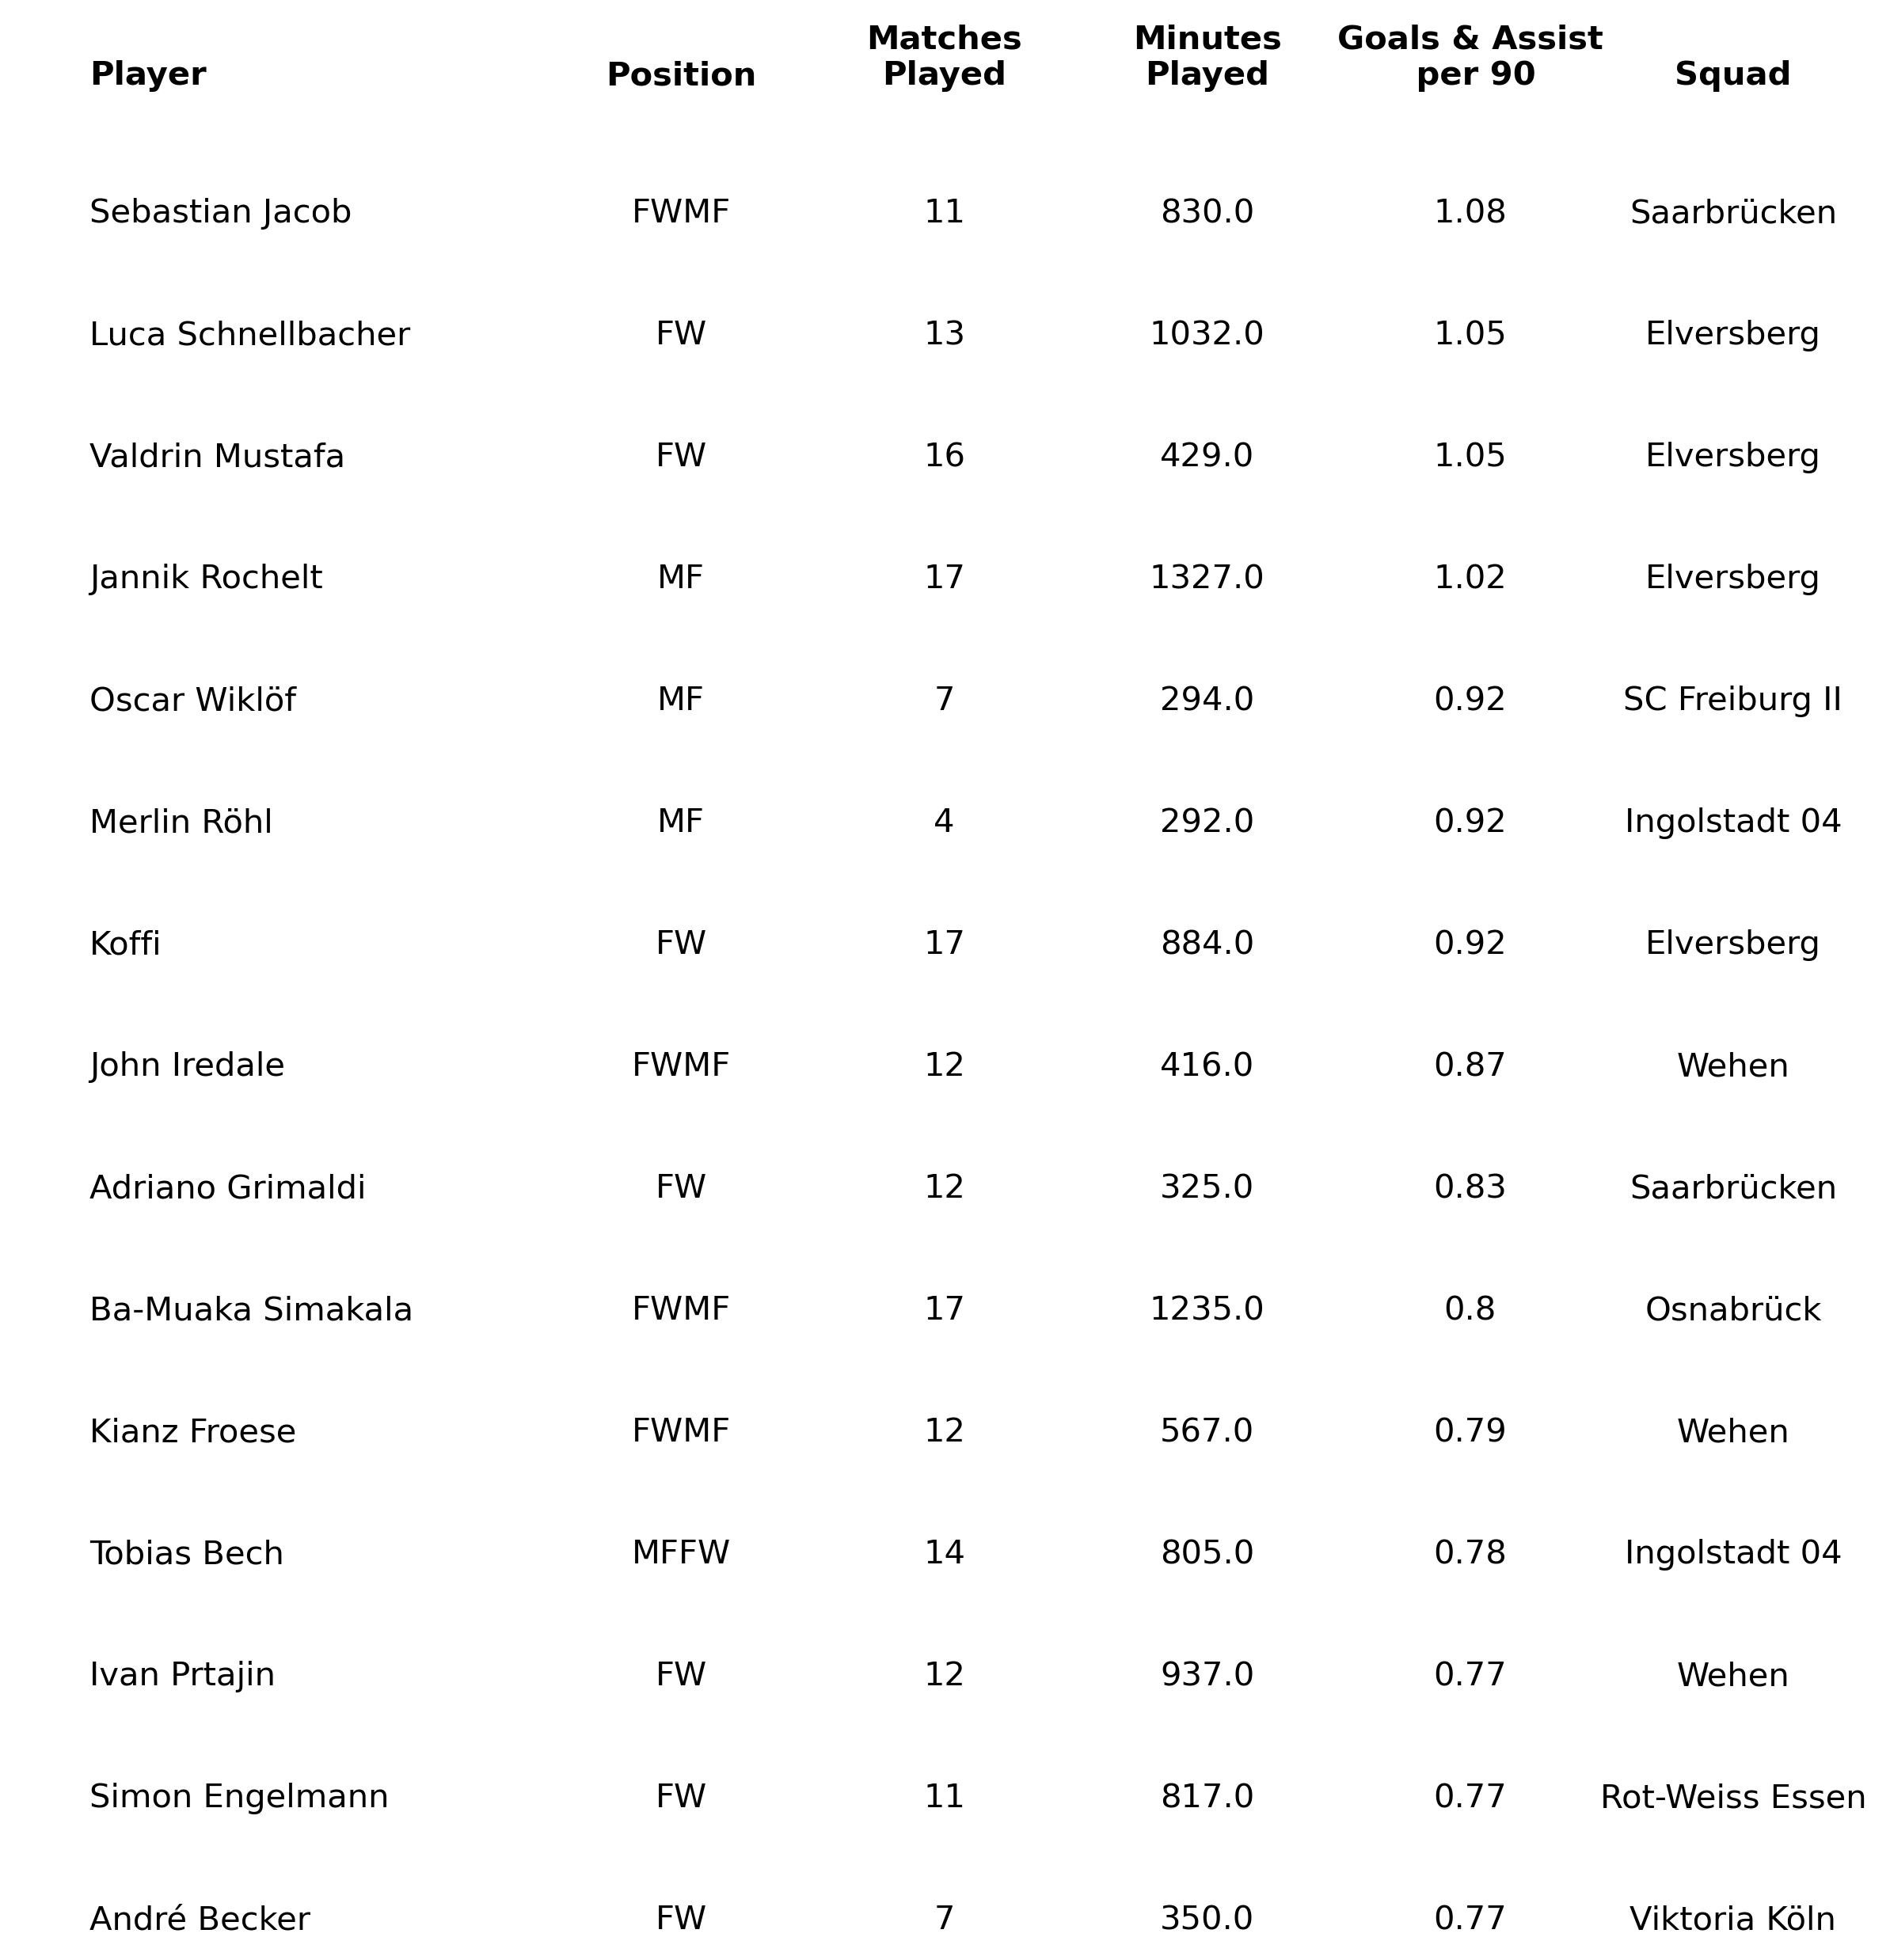

In [21]:
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows = df_selected.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows)

positions = [0.25, 2.5, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'MP', 'Min', 'G+A', 'Squad']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[j], i),
            text=df_selected[column].iloc[i],
            ha=ha,
            va='center'
        )

# Add column names
column_names = ['Player', 'Position', 'Matches\nPlayed',
                'Minutes\nPlayed', 'Goals & Assist\n per 90', 'Squad']
for index, c in enumerate(column_names):
    if index == 0:
        ha = 'left'
    else:
        ha = 'center'
    ax.annotate(
        xy=(positions[index], nrows),
        text=column_names[index],
        ha=ha,
        va='bottom',
        weight='bold'
    )

ax.set_axis_off()
plt.savefig(
    'figures/first_useful_table.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)


Follow Tutorial to get a better looking table


In [24]:
fig = plt.figure(figsize=(10, 10), dpi=300)
ax = plt.subplot()

ncols = 6
nrows = df_selected.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 2.5, 3.5, 4.5, 5.5, 6.5]
columns = ['Player', 'Pos', 'MP', 'Min', 'G+A', 'Squad']

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'G+A':
            text_label = f'{df_selected[column].iloc[i]}'
            weight = 'bold'
        if column == 'Min':
            text_label = f'{df_selected[column].iloc[i]:,.0f}'
            weight = 'normal'
        else:
            text_label = f'{df_selected[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=ha=ha,
            va='center',
            weight=weight
        )

# Add column names
column_names = ['Player', 'Position', 'Matches\nPlayed',
    'Minutes\nPlayed', 'Goals & Assist\n per 90', 'Squad']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
         ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

fig.text(
    x=0.15, y=.91,
    s='3. Liga top perfomers 22/23',
    ha='left',
    va='bottom',
    weight='bold',
    size=12
)
ax.fill_between(
    y1=nrows,
    y2=0,
    color='green',
    alpha=0.5,
    ec='None'
)

ax.set_axis_off()
plt.savefig(
    'figures/pretty_example.png',
    dpi=300,
    transparent=True,
    bbox_inches='tight'
)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 43)